# Momentum Trading On Tencent

### __IMPORTANT: This project is 100% done by Max Hong Ka Ho serving as academic study of the stock market and any results in this project should not be treated as investment advices for any individuals__

#### This project would use the 10 years Tencent Historical Data (2010 Jan 1 - 2020 Jan 1) as our main target to apply the renowned Momentum Indicator for backtest
### What is Momentum Indicator?

#### Momentum indicator is an indicator attempting to capture the current momentum of the stock price movement with reference to a past data. Many traders believe that if the current momentum is positive/negative in values, then tomorrow's stock price are very likely to follow yesterday's momentum to keep rising/falling

#### Momentum strategies can be constructed by the following approach:
#### the m periods Momentum at time t:
#### $Momemtum_t = P_t - P_{t-m}$
#### where $P_i$ is the stock price at time i

In [222]:
#import relevant strategies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [223]:
#read the stock data
tencent = pd.read_csv("0700.csv").dropna()
tencent.index = pd.to_datetime(tencent.Date)
tencent.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,33.400002,33.720001,33.279999,33.599998,31.135736,11261945.0
2010-01-05,2010-01-05,33.459999,34.599998,33.419998,34.360001,31.840004,24423510.0
2010-01-06,2010-01-06,34.520000,35.000000,34.380001,34.439999,31.914125,23279845.0
2010-01-07,2010-01-07,34.439999,34.660000,33.000000,33.119999,30.690937,27930995.0
2010-01-08,2010-01-08,32.680000,33.799999,32.680000,33.580002,31.117207,19976110.0


### Self-written Library for the Momentum Indicator

In [224]:
#define a momemtum function
def momentum(price, period):
    lagprice = price.shift(period)
    momentum = price - lagprice
    momentum = momentum.dropna()
    return momentum

### Let's construct one example to see the result

In [225]:
#get the close price
close = tencent['Close']
close.head()

Date
2010-01-04    33.599998
2010-01-05    34.360001
2010-01-06    34.439999
2010-01-07    33.119999
2010-01-08    33.580002
Name: Close, dtype: float64

In [226]:
#create the 10days Momentum Indicator
mtm10 = momentum(close, 10)
mtm10.head()

Date
2010-01-18    0.340001
2010-01-19   -2.119999
2010-01-20   -3.359999
2010-01-21   -2.519999
2010-01-22   -3.480002
Name: Close, dtype: float64

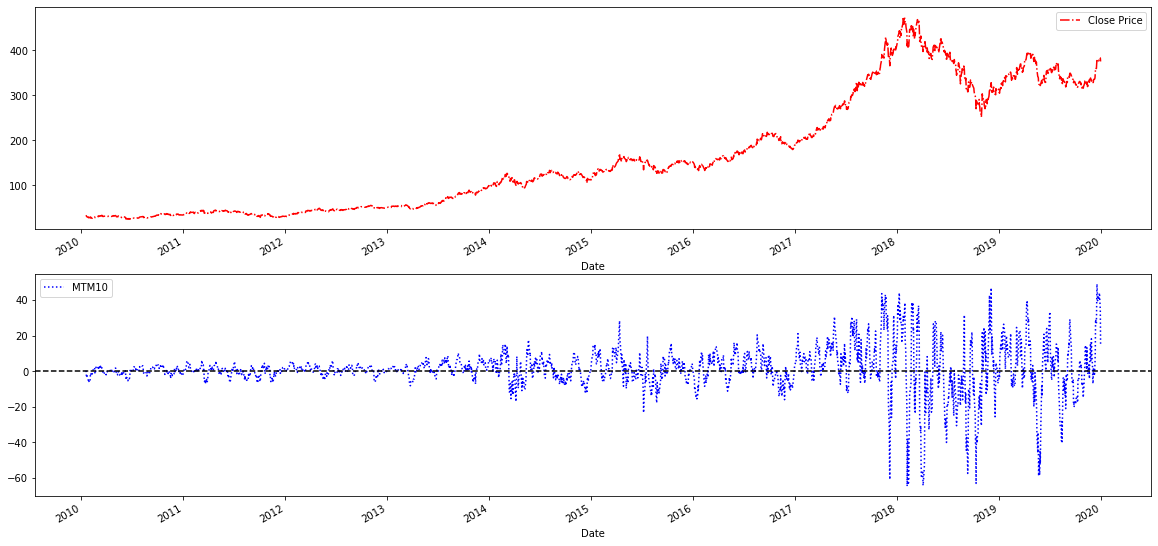

In [227]:
#take a look at the momentum and the close price
plt.figure(figsize = (20, 10))
plt.subplot(211)
close[10:].plot(color = 'r', linestyle = '-.', label = 'Close Price')
plt.legend()
plt.subplot(212)
mtm10.plot(color = 'b', linestyle = ':', label = 'MTM10')
plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.legend()

In [228]:
#create the trading signal
signal = [1 if mtm10[i] > 0 else -1 for i in range(len(mtm10))]
signal[:5]

[1, -1, -1, -1, -1]

In [229]:
#put the things together into a dataframe
result = pd.DataFrame({'Close': close[10:],
                       'MTM10': mtm10,
                       'Signal': signal},
                      index = mtm10.index)

In [230]:
result.head()

,Close,MTM10,Signal
Date,,,
2010-01-18,33.939999,0.340001,1
2010-01-19,32.240002,-2.119999,-1
2010-01-20,31.080000,-3.359999,-1
2010-01-21,30.600000,-2.519999,-1
2010-01-22,30.100000,-3.480002,-1


In [231]:
buy = [1]
sell = [0]
for i in range(1, len(mtm10)):
    if result['Signal'][i] == 1 and result['Signal'][i - 1] == -1:
        buy.append(1)
    else:
        buy.append(0)
for i in range(1, len(mtm10)):
    if result['Signal'][i] == -1 and result['Signal'][i - 1] == 1:
        sell.append(1)
    else:
        sell.append(0)

In [232]:
#take a look at the first ten elements
buy[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [233]:
sell[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [234]:
result['Buy Sig'] = np.array(buy)
result['Sell Sig'] = np.array(sell)
result.head()

,Close,MTM10,Signal,Buy Sig,Sell Sig
Date,,,,,
2010-01-18,33.939999,0.340001,1,1,0
2010-01-19,32.240002,-2.119999,-1,0,1
2010-01-20,31.080000,-3.359999,-1,0,0
2010-01-21,30.600000,-2.519999,-1,0,0
2010-01-22,30.100000,-3.480002,-1,0,0


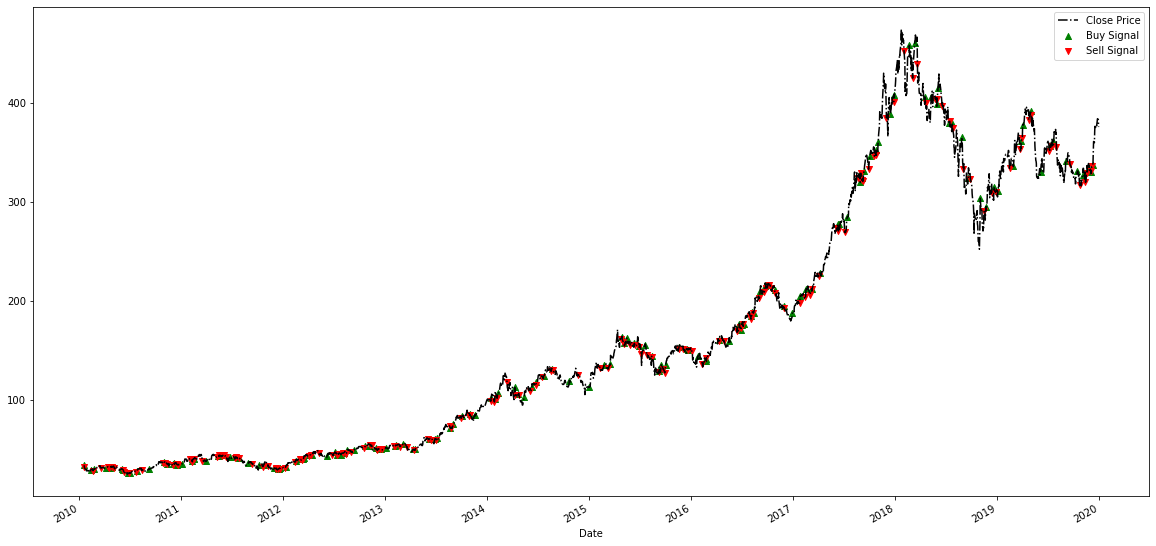

In [235]:
#plot the close price and mtm again with buy and sell signal 
plt.figure(figsize = (20, 10))
close[10:].plot(color = 'k', linestyle = '-.', label = 'Close Price')
plt.scatter(result['Buy Sig'][result['Buy Sig']==1].index, result['Close'][result['Buy Sig'] == 1], color = 'g', marker = '^', label = 'Buy Signal')
plt.scatter(result['Sell Sig'][result['Sell Sig']==1].index, result['Close'][result['Sell Sig'] == 1], color = 'r', marker = 'v', label = 'Sell Signal')
plt.legend()

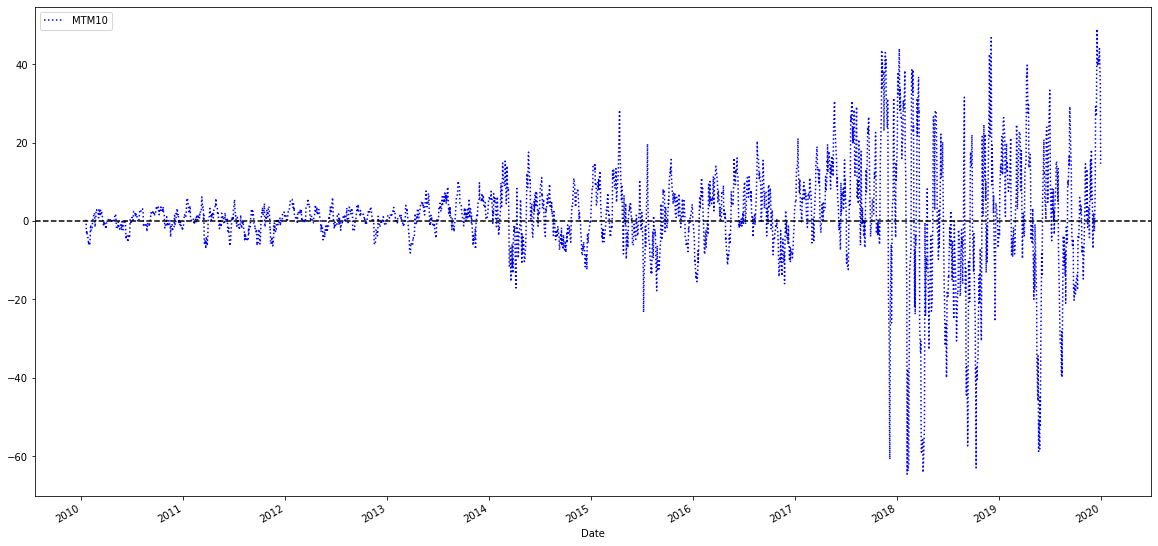

In [236]:
plt.figure(figsize = (20, 10))
mtm10.plot(color = 'b', linestyle = ':', label = 'MTM10')
plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.legend()

#### Recall the previous library
```Python
def trade(ret_series, signal):
    df = ret_series * signal.shift(1)
    df = df.dropna()
    return df

def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std
    
def backtest(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """ #documetation string
    wealth_index = 10000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns
    })
```

In [237]:
def trade(ret_series, signal):
    traderet = ret_series * signal.shift(1)
    traderet = traderet.dropna()
    return traderet

def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std
    
def backtest(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """ #documetation string
    wealth_index = 10000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns})

In [69]:
result['Return'] = (result['Close'] - result['Close'].shift(1)) / result['Close'].shift(1) 
result = result.dropna()
result.head()

C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,MTM10,Signal,Buy Sig,Sell Sig,Return,Trade Return
Date,,,,,,,
2010-01-21,30.600000,-2.519999,-1,0,0,-0.015444,0.015444
2010-01-22,30.100000,-3.480002,-1,0,0,-0.016340,0.016340
2010-01-25,29.840000,-4.320000,-1,0,0,-0.008638,0.008638
2010-01-26,28.620001,-5.100000,-1,0,0,-0.040885,0.040885
2010-01-27,28.280001,-5.899999,-1,0,0,-0.011880,0.011880


In [70]:
#carry out the trade
result['Trade Return'] = trade(result['Return'], result['Signal'])
result.head()

,Close,MTM10,Signal,Buy Sig,Sell Sig,Return,Trade Return
Date,,,,,,,
2010-01-21,30.600000,-2.519999,-1,0,0,-0.015444,NaN
2010-01-22,30.100000,-3.480002,-1,0,0,-0.016340,0.016340
2010-01-25,29.840000,-4.320000,-1,0,0,-0.008638,0.008638
2010-01-26,28.620001,-5.100000,-1,0,0,-0.040885,0.040885
2010-01-27,28.280001,-5.899999,-1,0,0,-0.011880,0.011880


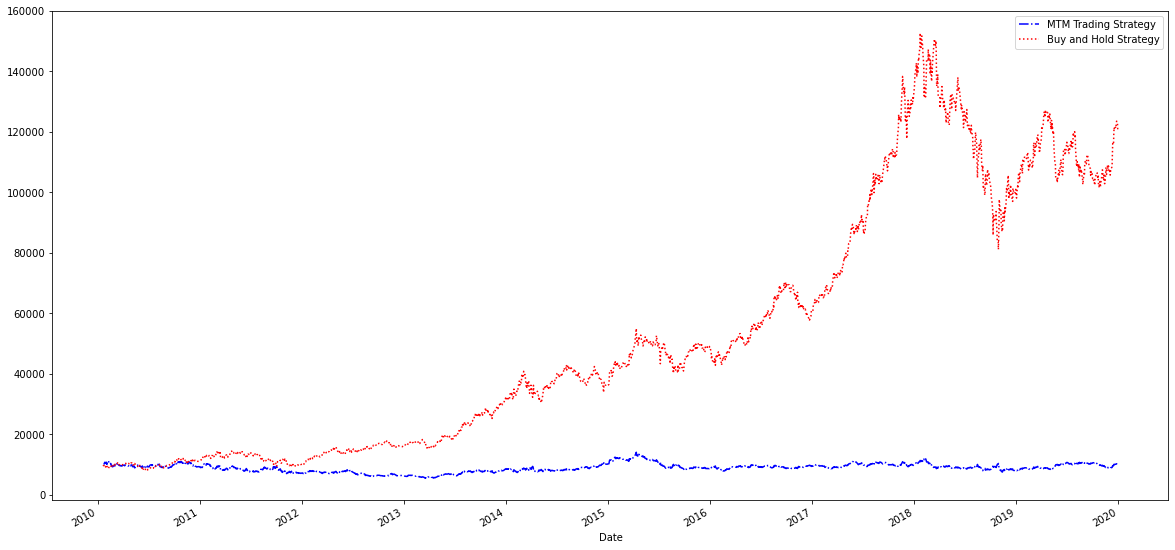

In [71]:
#visualize the backtest result
trade_result = backtest(result['Trade Return'])
stock_result = backtest(result['Return'])
trade_result['Wealth'].plot(figsize = (20, 10), color = 'b', linestyle = '-.', label = 'MTM Trading Strategy')
stock_result['Wealth'].plot(color = 'r', linestyle = ':', label = 'Buy and Hold Strategy')
plt.legend()

In [72]:
#calculate the statistics of the 10 MTM trading method
win = result['Trade Return'][result['Trade Return'] > 0]
loss = result['Trade Return'][result['Trade Return'] < 0]
accuracy = len(win) / (len(win) + len(loss))
accuracy

0.5025083612040134

In [73]:
#expected gain and expected loss
expected_gain = win.mean()
expected_loss = -loss.mean()
expected_value = accuracy * expected_gain - (1 - accuracy) * expected_loss
expected_gain, expected_loss, expected_value

(0.015057015897938146, 0.014800463794702191, 0.00020316939532861577)

In [74]:
#sharpe ratio, assume riskfree rate = 0
def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std

sharpe_ratio = Sharpe_Ratio(result['Trade Return'], 0)
sharpe_ratio

0.00014965657279392158

C:\Users\Hp User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hp User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   2.,   1.,   3.,   3.,   4.,   3.,   3.,
          7.,   5.,  10.,   9.,  14.,   8.,  10.,  22.,  30.,  25.,  36.,
         35.,  33.,  40.,  56.,  57.,  66.,  88.,  97., 105., 114., 107.,
        163., 146., 128., 108., 127.,  96.,  96.,  69.,  73.,  73.,  58.,
         37.,  44.,  33.,  31.,  23.,  26.,  18.,  15.,  17.,  13.,  11.,
          9.,   5.,   3.,   4.,   1.,   0.,   6.,   2.,   0.,   1.,   1.,
          2.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.11950539, -0.11738463, -0.11526388, -0.11314312, -0.11102237,
        -0.10890161, -0.10678086, -0.10466011, -0.10253935, -0.1004186 ,
        -0.09829784, -0.09617709, -0.09405633, -0.09193558, -0.08981482,
        -0.08769407, -0.08557331, -0.08345256, -0.08133181, -0.07921105,
        -0.0770903 , -0.07

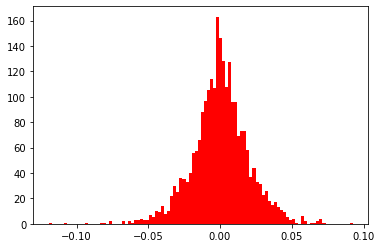

In [75]:
#plot the hist of the min and loss
plt.hist(result['Trade Return'], color = 'r', bins = 100)

## Hypothesis Testing to test whether the return of the Momentum Trading = 0
#### $H_0 : return = 0$
#### $H_1 : return \neq 0$

In [77]:
from scipy import stats
conf = stats.t.interval(0.95, len(result['Trade Return'].dropna()), np.mean(result['Trade Return'].dropna()), stats.sem(result['Trade Return'].dropna()))
conf

(-0.0005844242334171789, 0.0009816299494989104)

#### With 5% significance level, the expected return of the 10 MTM indicator is (-0.0005844242334171789, 0.0009816299494989104) which includes 0, that means the null hypothesis should not be rejected and the MTM 10 may not be meaningful to apply in the trading of Tencent

## Parameter Optimization:
#### After demonstrating how to construct the MTM10 and the corresponding results. Now, we are interested to optimize the parameter. That means, we should choose the m that can maximize our profits from the past data and put it into use in future, I would backtest the m ranging from 2 to 200

In [141]:
returns = (close - close.shift(1))/close.shift(1)
sharpe_ratio_list = []
accuracy_list = []
mean_win_list = []
mean_lose_list = []
expected_value_list = []
MaxDD_list = []
days = []
for i in range(2, 201):
    days.append(i)
    mtm = momentum(close, i)
    signal = [1 if mtm[i] > 0 else -1 for i in range(len(mtm))]
    signal = pd.Series(signal, index = mtm.index)
    Trade_Ret = trade(returns[i - 1: ], signal)
    Trade_Ret = Trade_Ret.dropna()
    sharpe_ratio = Sharpe_Ratio(Trade_Ret, 0)
    sharpe_ratio_list.append(sharpe_ratio)
    win = Trade_Ret[Trade_Ret > 0]
    loss = Trade_Ret[Trade_Ret < 0]
    accuracy = len(win) / (len(win) + len(loss))
    accuracy_list.append(accuracy)
    expected_gain = win.mean()
    mean_win_list.append(expected_gain)
    expected_loss = -loss.mean()
    mean_lose_list.append(expected_loss)
    expected_value = accuracy * expected_gain - (1 - accuracy) * expected_loss
    expected_value_list.append(expected_value)
    trade_result = backtest(Trade_Ret)
    MAXDD = - trade_result['Drawdown'].min()
    MaxDD_list.append(MAXDD)

In [142]:
sharpe_ratio_list = np.array(sharpe_ratio_list)
sharpe_ratio_list

array([ 0.00802719, -0.03251874, -0.0079048 ,  0.00554324, -0.00270221,
       -0.00731989,  0.00464623, -0.00359986,  0.00013461, -0.0003631 ,
        0.01642459,  0.01637409,  0.00839345,  0.01590603,  0.03959209,
        0.03127996,  0.01635895,  0.02837912,  0.028967  ,  0.03210977,
        0.03892317,  0.03116931,  0.02769326,  0.03001104,  0.02088793,
        0.02587719,  0.02772201,  0.02638952,  0.01863377,  0.01242801,
        0.01979611,  0.01543741,  0.02083158,  0.02034974,  0.02866242,
        0.027572  ,  0.0239369 ,  0.01982888,  0.01336067,  0.00530464,
        0.0033355 ,  0.01143188,  0.02619069,  0.01707802,  0.01239645,
        0.01261952,  0.01525587,  0.02034499,  0.01895589,  0.00261571,
        0.0072559 , -0.0001339 ,  0.01995199,  0.0236907 ,  0.02072632,
        0.02649177,  0.03107134,  0.03686468,  0.03157308,  0.01965062,
        0.01399063,  0.00315015,  0.02171222,  0.0233287 ,  0.02526605,
        0.02848038,  0.02888832,  0.0269342 ,  0.02525242,  0.01

In [143]:
accuracy_list = np.array(accuracy_list)
accuracy_list

array([0.49105285, 0.48251457, 0.49521033, 0.4975    , 0.49604002,
       0.49666389, 0.49687109, 0.49874791, 0.50271399, 0.50167084,
       0.50605934, 0.51086957, 0.503555  , 0.51380753, 0.52239431,
       0.52261307, 0.51822371, 0.52095557, 0.52410901, 0.52474832,
       0.52496853, 0.51511335, 0.51700966, 0.51806723, 0.51660361,
       0.51471825, 0.51745898, 0.52020202, 0.51494737, 0.51516428,
       0.51748841, 0.51517707, 0.52214256, 0.52531646, 0.53060363,
       0.52829392, 0.52302493, 0.52240068, 0.52389006, 0.51818951,
       0.51629285, 0.52159187, 0.52520119, 0.51991525, 0.5175922 ,
       0.51653944, 0.51972847, 0.51485569, 0.51507431, 0.51146984,
       0.50998725, 0.50807823, 0.51467461, 0.51829787, 0.51681567,
       0.52086882, 0.51938645, 0.52344416, 0.52110874, 0.51322526,
       0.51771233, 0.50853971, 0.5160188 , 0.51495726, 0.51560496,
       0.51625321, 0.51647411, 0.51840753, 0.5130621 , 0.51199657,
       0.51650236, 0.51586621, 0.51051051, 0.5055794 , 0.51180

In [144]:
mean_win_list = np.array(mean_win_list)
mean_win_list

array([0.01561503, 0.01503186, 0.01514919, 0.01535191, 0.01522984,
       0.01511781, 0.01535743, 0.01512886, 0.01507472, 0.01508095,
       0.01527617, 0.01513121, 0.01519017, 0.0150377 , 0.01523626,
       0.01507128, 0.01490005, 0.01505668, 0.01497172, 0.01501732,
       0.01512158, 0.01525415, 0.01511395, 0.01513118, 0.01499587,
       0.01514248, 0.01508529, 0.01497711, 0.01497603, 0.01484866,
       0.01491288, 0.01488113, 0.01478629, 0.0146896 , 0.01470457,
       0.01474663, 0.0148241 , 0.01476149, 0.01459913, 0.01459457,
       0.01460221, 0.01460912, 0.0147936 , 0.01476464, 0.01474566,
       0.01478126, 0.01473106, 0.01497119, 0.01494389, 0.01471158,
       0.01484988, 0.01476573, 0.01496716, 0.01494084, 0.01493158,
       0.01493195, 0.01506541, 0.01506046, 0.01502816, 0.01502804,
       0.01478929, 0.01484348, 0.01498588, 0.01505407, 0.01507607,
       0.01512461, 0.01512856, 0.0150383 , 0.01516064, 0.01508505,
       0.01505353, 0.01489387, 0.01488036, 0.01495839, 0.01494

In [145]:
mean_lose_list = np.array(mean_lose_list)
mean_lose_list

array([0.01435319, 0.01489898, 0.01478143, 0.01457713, 0.01470125,
       0.01481224, 0.0145806 , 0.01479778, 0.01483009, 0.01479488,
       0.01457452, 0.01471859, 0.01466367, 0.01481912, 0.01457526,
       0.01475823, 0.01492688, 0.01476198, 0.01484125, 0.01479826,
       0.0146432 , 0.0145008 , 0.01461447, 0.01460152, 0.01474547,
       0.01457945, 0.0146116 , 0.01471985, 0.01471794, 0.01485286,
       0.01475949, 0.01476603, 0.01486807, 0.01497942, 0.01497549,
       0.01492356, 0.0148335 , 0.01489853, 0.0150846 , 0.01506475,
       0.0150386 , 0.01503503, 0.01484131, 0.01486423, 0.01489552,
       0.0148594 , 0.01489282, 0.01463991, 0.01468119, 0.01489151,
       0.01475599, 0.01485495, 0.01464203, 0.01468044, 0.01470197,
       0.01471167, 0.01457342, 0.01457671, 0.01461781, 0.01462802,
       0.0148828 , 0.01482785, 0.01466874, 0.01460901, 0.01459154,
       0.01454945, 0.01454986, 0.01465287, 0.01452517, 0.01461271,
       0.01465231, 0.01483218, 0.01483778, 0.0147579 , 0.01476

In [146]:
expected_value_list = np.array(expected_value_list)
expected_value_list

array([ 3.62790402e-04, -4.56914133e-04,  4.05188430e-05,  3.12566537e-04,
        1.45765633e-04,  5.29335907e-05,  2.94741689e-04,  1.28068132e-04,
        2.03472699e-04,  1.92953274e-04,  5.31700267e-04,  5.30767052e-04,
        3.69377441e-04,  5.21540026e-04,  9.98106104e-04,  8.31060338e-04,
        5.30139467e-04,  7.72218689e-04,  7.83997209e-04,  8.47413453e-04,
        9.82371388e-04,  8.26376034e-04,  7.55412392e-04,  8.02017884e-04,
        6.19015454e-04,  7.18968732e-04,  7.55321564e-04,  7.28571795e-04,
        5.72892174e-04,  4.48305595e-04,  5.95617107e-04,  5.07510218e-04,
        6.15729345e-04,  6.06205565e-04,  7.72855857e-04,  7.51024283e-04,
        6.78167903e-04,  5.95886364e-04,  4.66407519e-04,  3.04399938e-04,
        2.64735457e-04,  4.27121286e-04,  7.22981717e-04,  5.40267439e-04,
        4.46526976e-04,  4.51170088e-04,  5.03552469e-04,  6.05535166e-04,
        5.77925776e-04,  2.49574145e-04,  3.42630028e-04,  1.94670119e-04,
        5.97066763e-04,  

In [147]:
MaxDD_list = np.array(MaxDD_list)
MaxDD_list

array([0.53360395, 0.8822983 , 0.6899915 , 0.48089762, 0.60309999,
       0.63716537, 0.5675912 , 0.54669653, 0.50522323, 0.50500824,
       0.44029531, 0.43873285, 0.52635683, 0.51472981, 0.37430175,
       0.43264215, 0.41842337, 0.39670239, 0.56837738, 0.36778182,
       0.33652993, 0.37960325, 0.37840576, 0.37703805, 0.42319486,
       0.40308193, 0.43584703, 0.41539949, 0.54054262, 0.67632924,
       0.62314051, 0.59452294, 0.51576472, 0.57147801, 0.45400002,
       0.4850474 , 0.48904327, 0.55735389, 0.53589401, 0.71046342,
       0.73544876, 0.66459305, 0.49914425, 0.50995547, 0.55071043,
       0.60528753, 0.52306886, 0.50680805, 0.55282791, 0.58900837,
       0.68808909, 0.72428116, 0.46068392, 0.49225641, 0.50913333,
       0.46131835, 0.45087554, 0.47950931, 0.40333986, 0.4869032 ,
       0.53051487, 0.50425223, 0.43567874, 0.47297917, 0.48055554,
       0.41115254, 0.43669036, 0.43728903, 0.43326101, 0.57424313,
       0.50154182, 0.66229862, 0.68755857, 0.68983857, 0.70539

In [156]:
#get the parameter with largest sharpe ratio
index1 = np.where(sharpe_ratio_list == sharpe_ratio_list.max())
index1 = index1[0][0]
max_sharpe_param = days[index1]
max_sharpe_param

140

In [170]:
#corresponding accuracy, expected gain, expected loss, expected value and MAXDD
acc1 = accuracy_list[index1]
gain1 = mean_win_list[index1]
loss1 = mean_lose_list[index1]
ev1 = expected_value_list[index1]
maxdd1 = MaxDD_list[index1]
sr1 = sharpe_ratio_list[index1]
acc1, gain1, loss1, ev1, maxdd1, sr1

(0.5246913580246914,
 0.015017485860739931,
 0.014436283343980966,
 0.0010178548189898745,
 0.38808219082557427,
 0.04119023108407506)

In [154]:
#get the parameter with greatest accuracy
index2 = np.where(accuracy_list == accuracy_list.max())
max_acc_param = days[index2[0][0]]
max_acc_param

36

In [168]:
#corresponding accuracy, expected gain, expected loss, expected value and MAXDD
acc2 = accuracy_list[index2[0][0]]
gain2 = mean_win_list[index2[0][0]]
loss2 = mean_lose_list[index2[0][0]]
ev2 = expected_value_list[index2[0][0]]
maxdd2 = MaxDD_list[index2[0][0]]
sr2 = sharpe_ratio_list[index2[0][0]]
acc2, gain2, loss2, ev2, maxdd2, sr2

(0.5306036302237231,
 0.014704571169475718,
 0.014975494995167678,
 0.0007728558570724029,
 0.45400001804324047,
 0.028662418194876985)

In [159]:
#get the parameter with greatest expected gain
index3 = np.where(mean_win_list == mean_win_list.max())
max_gain_param = days[index3[0][0]]
max_gain_param

2

In [160]:
#get the parameter with smallest expected loss
index4 = np.where(mean_lose_list == mean_lose_list.min())
min_loss_param = days[index4[0][0]]
min_loss_param

2

In [166]:
#get the parameter with greatest expected value
index5 = np.where(expected_value_list == expected_value_list.max())
max_ev_param = days[index5[0][0]]
max_ev_param

140

In [171]:
#corresponding accuracy, expected gain, expected loss, expected value and MAXDD
acc3 = accuracy_list[index3[0][0]]
gain3 = mean_win_list[index3[0][0]]
loss3 = mean_lose_list[index3[0][0]]
ev3 = expected_value_list[index3[0][0]]
maxdd3 = MaxDD_list[index3[0][0]]
sr3 = sharpe_ratio_list[index3[0][0]]

acc3, gain3, loss3, ev3, maxdd3, sr3

(0.4910528506034124,
 0.015615033741548595,
 0.014353192541820686,
 0.00036279040215590665,
 0.5336039473050769,
 0.008027194580452042)

In [135]:
#get the parameter with smallest Max DrawDown
index6 = np.where(MaxDD_list == MaxDD_list.min())
min_maxdd_param = days[index6[0][0]]
min_maxdd_param

22

In [172]:
#corresponding accuracy, expected gain, expected loss, expected value and MAXDD
acc4 = accuracy_list[index6[0][0]]
gain4 = mean_win_list[index6[0][0]]
loss4 = mean_lose_list[index6[0][0]]
ev4 = expected_value_list[index6[0][0]]
maxdd4 = MaxDD_list[index6[0][0]]
sr4 = sharpe_ratio_list[index6[0][0]]

acc4, gain4, loss4, ev4, maxdd4, sr4

(0.5249685270667226,
 0.015121575713208907,
 0.014643198056921545,
 0.0009823713876580577,
 0.3365299280065676,
 0.038923174609949235)

In [139]:
#backtest to see which of the above one has the highest actual return into practice
days_to_test = [max_sharpe_param, max_acc_param , max_gain_param, min_maxdd_param]
actual_return_list = []
for i in days_to_test:
    days.append(i)
    mtm = momentum(close, i)
    signal = [1 if mtm[i] > 0 else -1 for i in range(len(mtm))]
    signal = pd.Series(signal, index = mtm.index)
    Trade_Ret = trade(returns[i - 1: ], signal)
    Trade_Ret = Trade_Ret.dropna()
    trade_result = backtest(Trade_Ret)
    actualreturn = (trade_result['Wealth'][-1] - trade_result['Wealth'][0]) / trade_result['Wealth'][0]
    actual_return_list.append(actualreturn)

In [140]:
actual_return_list

[5.497059301114203, 2.9805252956425194, 0.5365182806344585, 5.291708015665821]

In [173]:
#summary of selected best parameters
summary = pd.DataFrame({'MTM2': [acc3, gain3, loss3, ev3, maxdd3, sr3, actual_return_list[2]],
                        'MTM22': [acc4, gain4, loss4, ev4, maxdd4, sr4, actual_return_list[3]],
                        'MTM36': [acc2, gain2, loss2, ev2, maxdd2, sr2, actual_return_list[1]],
                        'MTM140': [acc1, gain1, loss1, ev1, maxdd1, sr1, actual_return_list[0]]},
                       index = ['Accuracy', 'Expected Gain', 'Expected Loss', 'Expected Value', 'Max Drawdown', 'Sharpe Ratio', 'Actual Return'])

In [174]:
summary

,MTM2,MTM22,MTM36,MTM140
Accuracy,0.491053,0.524969,0.530604,0.524691
Expected Gain,0.015615,0.015122,0.014705,0.015017
Expected Loss,0.014353,0.014643,0.014975,0.014436
Expected Value,0.000363,0.000982,0.000773,0.001018
Max Drawdown,0.533604,0.336530,0.454000,0.388082
Sharpe Ratio,0.008027,0.038923,0.028662,0.041190
Actual Return,0.536518,5.291708,2.980525,5.497059


### Take a closer look to the parameter m = 140

In [176]:
mtm = momentum(close, 140)
signal = [1 if mtm[i] > 0 else -1 for i in range(len(mtm))]
signal = pd.Series(signal, index = mtm.index)
Trade_Ret = trade(returns[140 - 1: ], signal)
Trade_Ret = Trade_Ret.dropna()
trade_result = backtest(Trade_Ret)
result = pd.DataFrame()

In [214]:
results1 = pd.DataFrame({'Trade Return': Trade_Ret,
                         'Close': close[mtm.index],
                         'Signal': signal,
                         'MTM': mtm})
results1.head()

,Trade Return,Close,Signal,MTM
Date,,,,
2010-07-29,NaN,29.740000,-1,-3.859998
2010-07-30,-0.006725,29.940001,-1,-4.420000
2010-08-02,-0.010688,30.260000,-1,-4.179999
2010-08-03,0.001983,30.200001,-1,-2.919998
2010-08-04,-0.015232,30.660000,-1,-2.920002


In [215]:
buy = [0]
sell = [1]
for i in range(1, len(results1['Signal'])):
    if results1['Signal'][i] == 1 and results1['Signal'][i - 1] == -1:
        buy.append(1)
    else:
        buy.append(0)
for i in range(1, len(mtm10)):
    if results1['Signal'][i] == -1 and results1['Signal'][i - 1] == 1:
        sell.append(1)
    else:
        sell.append(0)

IndexError: index out of bounds

In [216]:
results1['Buy Sig'] = buy
results1['Sell Sig'] = sell
results1.tail()

,Trade Return,Close,Signal,MTM,Buy Sig,Sell Sig
Date,,,,,,
2019-12-23,0.006930,377.799988,1,50.599976,0,0
2019-12-24,-0.002647,376.799988,1,45.799988,0,0
2019-12-27,0.019108,384.000000,1,53.600006,0,0
2019-12-30,-0.002083,383.200012,1,40.200012,0,0
2019-12-31,-0.019833,375.600006,1,31.000000,0,0


In [243]:
#cal the return of buy and hold
(stock_result['Wealth'][-1] - stock_result['Wealth'][0]) / stock_result['Wealth'][0]

11.819113270276793

#### Not surprisingly, the MTM strategy is having lower return than buy and hold strategy although it is the highest among all the 200 parameters

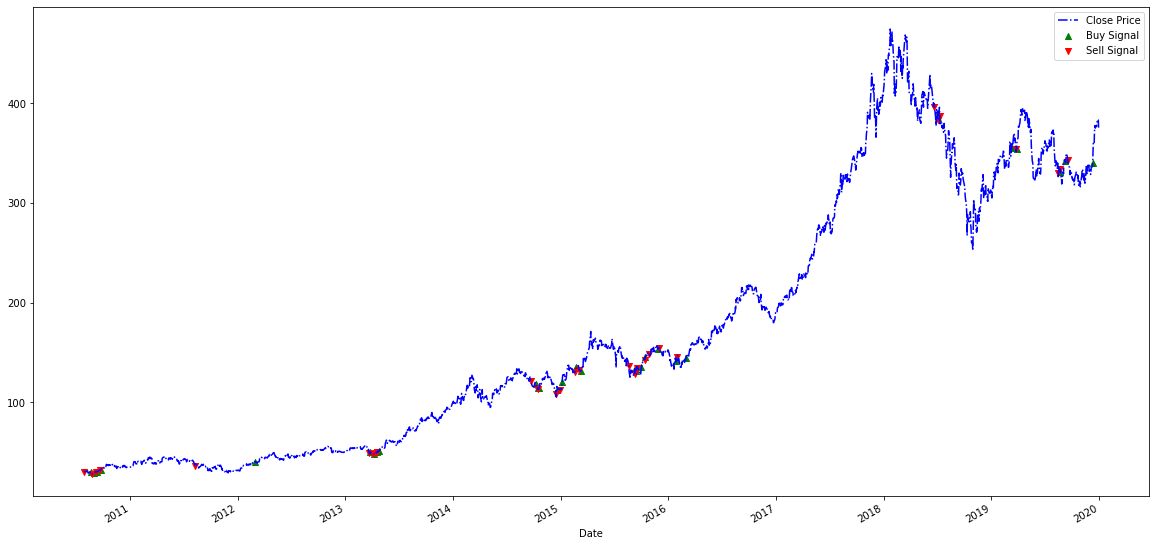

In [217]:
#plot the result
plt.figure(figsize = (20, 10))
results1.Close.plot(color = 'b', linestyle = '-.', label = 'Close Price')
plt.scatter(results1['Buy Sig'][results1['Buy Sig']==1].index, results1['Close'][results1['Buy Sig'] == 1], color = 'g', marker = '^', label = 'Buy Signal')
plt.scatter(results1['Sell Sig'][results1['Sell Sig']==1].index, results1['Close'][results1['Sell Sig'] == 1], color = 'r', marker = 'v', label = 'Sell Signal')
plt.legend()

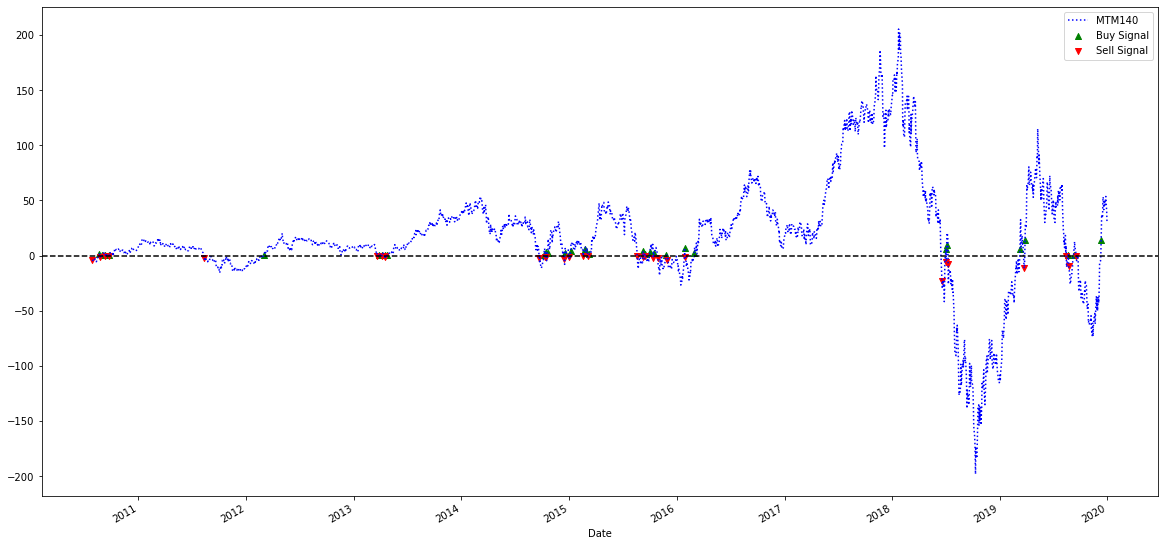

In [219]:
#plot the mtm
plt.figure(figsize = (20, 10))
mtm.plot(color = 'b', linestyle = ':', label = 'MTM140')
plt.scatter(results1['Buy Sig'][results1['Buy Sig']==1].index, results1['MTM'][results1['Buy Sig'] == 1], color = 'g', marker = '^', label = 'Buy Signal')
plt.scatter(results1['Sell Sig'][results1['Sell Sig']==1].index, results1['MTM'][results1['Sell Sig'] == 1], color = 'r', marker = 'v', label = 'Sell Signal')
plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.legend()

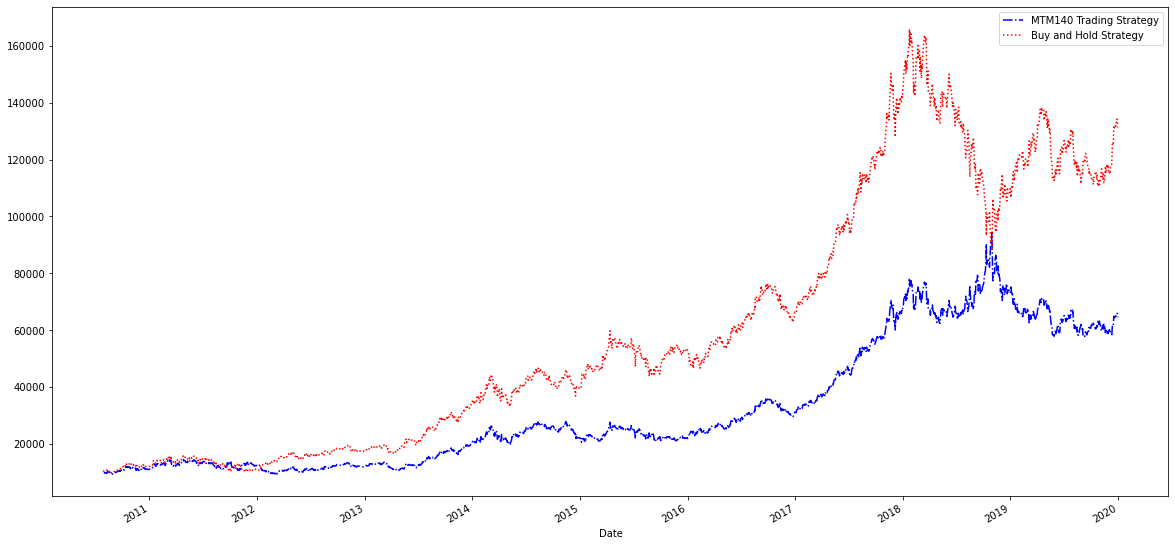

In [242]:
#plot the wealth wrt the stock results
#visualize the backtest result
trade_result = backtest(results1['Trade Return'])
stock_result = backtest(returns[140 - 1: ])
trade_result['Wealth'].plot(figsize = (20, 10), color = 'b', linestyle = '-.', label = 'MTM140 Trading Strategy')
stock_result['Wealth'].plot(color = 'r', linestyle = ':', label = 'Buy and Hold Strategy')
plt.legend()

#### We have observed that m = 140 will bring us 550 % profit in trading tencent within 10 years, followed by m = 22 which gives us 529% profit in this 10 years.
#### Besides, m = 140 parameter will give us the largest sharpe ratio and maximum expected value

### Conclusion
#### MTM strategy is not a very accurate strategy with up to 53% accuracy only, Moreover, it fails to add a lot of value to the traders becuase it creates a maximum of 549% return from 2010 - 2020 after parameter optimization while just buy and hold Tencent will give us 1100 % return. That means, the MTM strategy is fallible that it gives the return poorer than stationary strategy. I would suggest not using MTM in your trading since the trading signals of MTM didn't help much. This is the end of our testing, hope you would like this project